In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import halfspace.projections as hsp

In [51]:
fdf = pd.read_csv('../fault_data/fault_df_inv.csv')

In [52]:
fdf.head()

,EVENT_ID,depth,dip,east,fault_name,htm_ind,north,point_index,rake,sig_nn,...,xx_stress,xy_stress,xz_stress,yy_stress,yz_stress,zz_stress,txx,tyy,txy,tau_rake
0,NaN,-18166.666667,70.619256,-55729.125497,gurla,NaN,3341329.054816,0,-170.584876,142.473296,...,57.983532,38.709333,-3.130255,140.814060,-7.833799,122.365046,-9.231886,72.850762,37.446496,145.197086
1,NaN,-16527.333333,73.934283,-54657.964479,gurla,NaN,3341155.562365,1,-169.672261,133.973200,...,60.434603,35.630217,-2.546067,136.122469,-7.169587,122.802498,-8.398814,66.276816,34.067379,161.215385
2,NaN,-13288.333333,68.460230,-53918.655475,gurla,NaN,3341974.752790,2,-166.248248,125.511555,...,65.652053,29.637668,-1.578494,127.308890,-5.545806,123.452559,-6.752828,53.287993,27.390909,165.825389
3,NaN,-11725.000000,69.749617,-54321.288308,gurla,NaN,3343089.493691,3,-168.232733,124.935294,...,68.381670,26.899948,-1.128569,123.375707,-4.596917,123.926082,-5.958378,47.018818,24.168449,166.059318
4,NaN,-18510.000000,70.715283,-57216.150551,gurla,NaN,3342311.810013,4,-168.045877,137.953272,...,57.582461,39.310817,-3.483587,141.945827,-7.801336,122.374934,-9.406360,74.227575,38.154200,157.032293


In [53]:
fdf.describe()

,EVENT_ID,depth,dip,east,htm_ind,north,point_index,rake,sig_nn,slip_m,...,xx_stress,xy_stress,xz_stress,yy_stress,yz_stress,zz_stress,txx,tyy,txy,tau_rake
count,7.600000e+01,796.000000,796.000000,796.000000,110,796.000000,7.960000e+02,796.000000,796.000000,791.000000,...,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000
mean,3.935226e+07,-8596.994640,49.715302,103792.898077,9999,3264692.026692,3.757408e+06,-40.874890,99.106532,0.199132,...,62.803925,18.904720,-4.811861,101.751427,-5.099441,98.799977,-4.368797,34.475098,17.720770,-42.590003
std,1.334292e+08,6930.771604,19.525128,201118.793916,0,116465.472302,4.258484e+07,128.329104,36.540323,0.363824,...,21.930522,13.745025,5.699524,39.933768,7.668224,37.958111,3.522060,27.793321,14.286226,106.300174
min,2.440890e+05,-25418.900000,4.000000,-125465.156335,9999,2957849.113062,0.000000e+00,-179.958757,5.157330,0.001200,...,2.621615,-7.982639,-26.264985,9.425106,-34.373000,4.583153,-12.917306,-11.753702,-6.041597,-179.931587
25%,1.176039e+06,-13780.833333,41.316580,-59747.377654,9999,3189377.300000,8.075000e+01,-159.755383,85.179862,0.100000,...,50.487581,7.557628,-8.751820,78.720090,-8.519040,75.089044,-7.003105,10.268282,5.278066,-136.728661
50%,9.889522e+06,-7360.833333,55.937968,99214.916667,9999,3218741.016667,1.850000e+02,-82.604206,111.446053,0.100000,...,68.475905,17.159029,-2.991214,108.946627,-3.537304,118.206600,-3.740608,29.517926,15.172702,-74.160090
75%,1.339640e+07,-2560.583333,64.100759,127861.083333,9999,3379423.573963,3.040000e+02,80.164675,120.417991,0.100000,...,76.790727,29.405069,-0.511337,131.812505,-0.741059,125.378995,-1.301230,55.262984,28.406087,36.896209
max,6.014569e+08,2931.000000,89.000000,990874.017750,9999,3429747.093679,6.014569e+08,179.959805,179.956163,3.106400,...,110.600214,51.766289,7.764514,177.686089,28.835635,167.383188,1.489467,101.933187,52.395343,179.894104


In [54]:
fdf.columns

Index(['EVENT_ID', 'depth', 'dip', 'east', 'fault_name', 'htm_ind', 'north',
       'point_index', 'rake', 'sig_nn', 'slip_m', 'strike', 'tau_dd', 'tau_ss',
       'xx_stress', 'xy_stress', 'xz_stress', 'yy_stress', 'yz_stress',
       'zz_stress', 'txx', 'tyy', 'txy', 'tau_rake'],
      dtype='object')

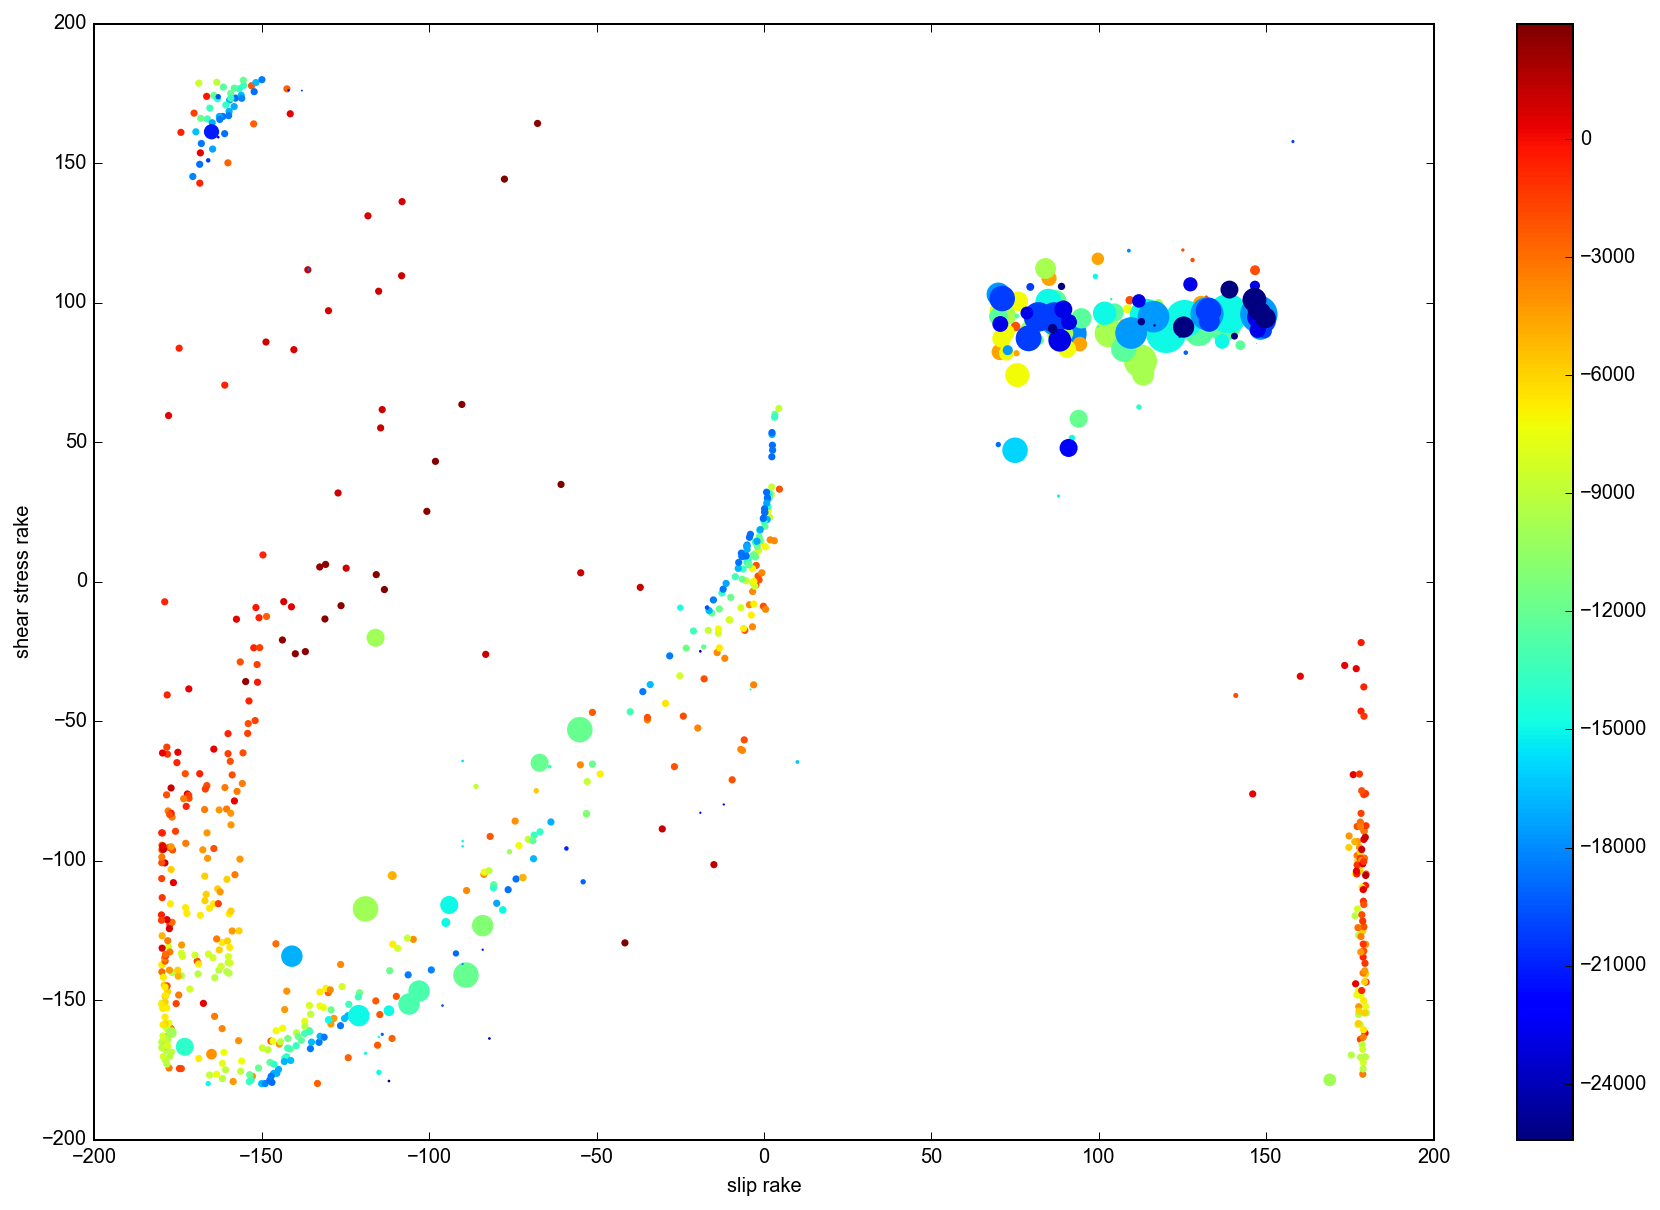

In [55]:
plt.figure(figsize=(15,10))

plt.scatter(fdf.rake, 
            fdf.tau_rake,
            c=fdf.depth,
            s=fdf.slip_m * 130, lw=0)
plt.colorbar()
plt.xlabel('slip rake')
plt.ylabel('shear stress rake')
plt.show()

In [56]:
fdf.head()

,EVENT_ID,depth,dip,east,fault_name,htm_ind,north,point_index,rake,sig_nn,...,xx_stress,xy_stress,xz_stress,yy_stress,yz_stress,zz_stress,txx,tyy,txy,tau_rake
0,NaN,-18166.666667,70.619256,-55729.125497,gurla,NaN,3341329.054816,0,-170.584876,142.473296,...,57.983532,38.709333,-3.130255,140.814060,-7.833799,122.365046,-9.231886,72.850762,37.446496,145.197086
1,NaN,-16527.333333,73.934283,-54657.964479,gurla,NaN,3341155.562365,1,-169.672261,133.973200,...,60.434603,35.630217,-2.546067,136.122469,-7.169587,122.802498,-8.398814,66.276816,34.067379,161.215385
2,NaN,-13288.333333,68.460230,-53918.655475,gurla,NaN,3341974.752790,2,-166.248248,125.511555,...,65.652053,29.637668,-1.578494,127.308890,-5.545806,123.452559,-6.752828,53.287993,27.390909,165.825389
3,NaN,-11725.000000,69.749617,-54321.288308,gurla,NaN,3343089.493691,3,-168.232733,124.935294,...,68.381670,26.899948,-1.128569,123.375707,-4.596917,123.926082,-5.958378,47.018818,24.168449,166.059318
4,NaN,-18510.000000,70.715283,-57216.150551,gurla,NaN,3342311.810013,4,-168.045877,137.953272,...,57.582461,39.310817,-3.483587,141.945827,-7.801336,122.374934,-9.406360,74.227575,38.154200,157.032293


In [57]:
fdf['']

KeyError: ''

In [58]:
tdf = fdf[fdf.fault_name=='tib_dog']

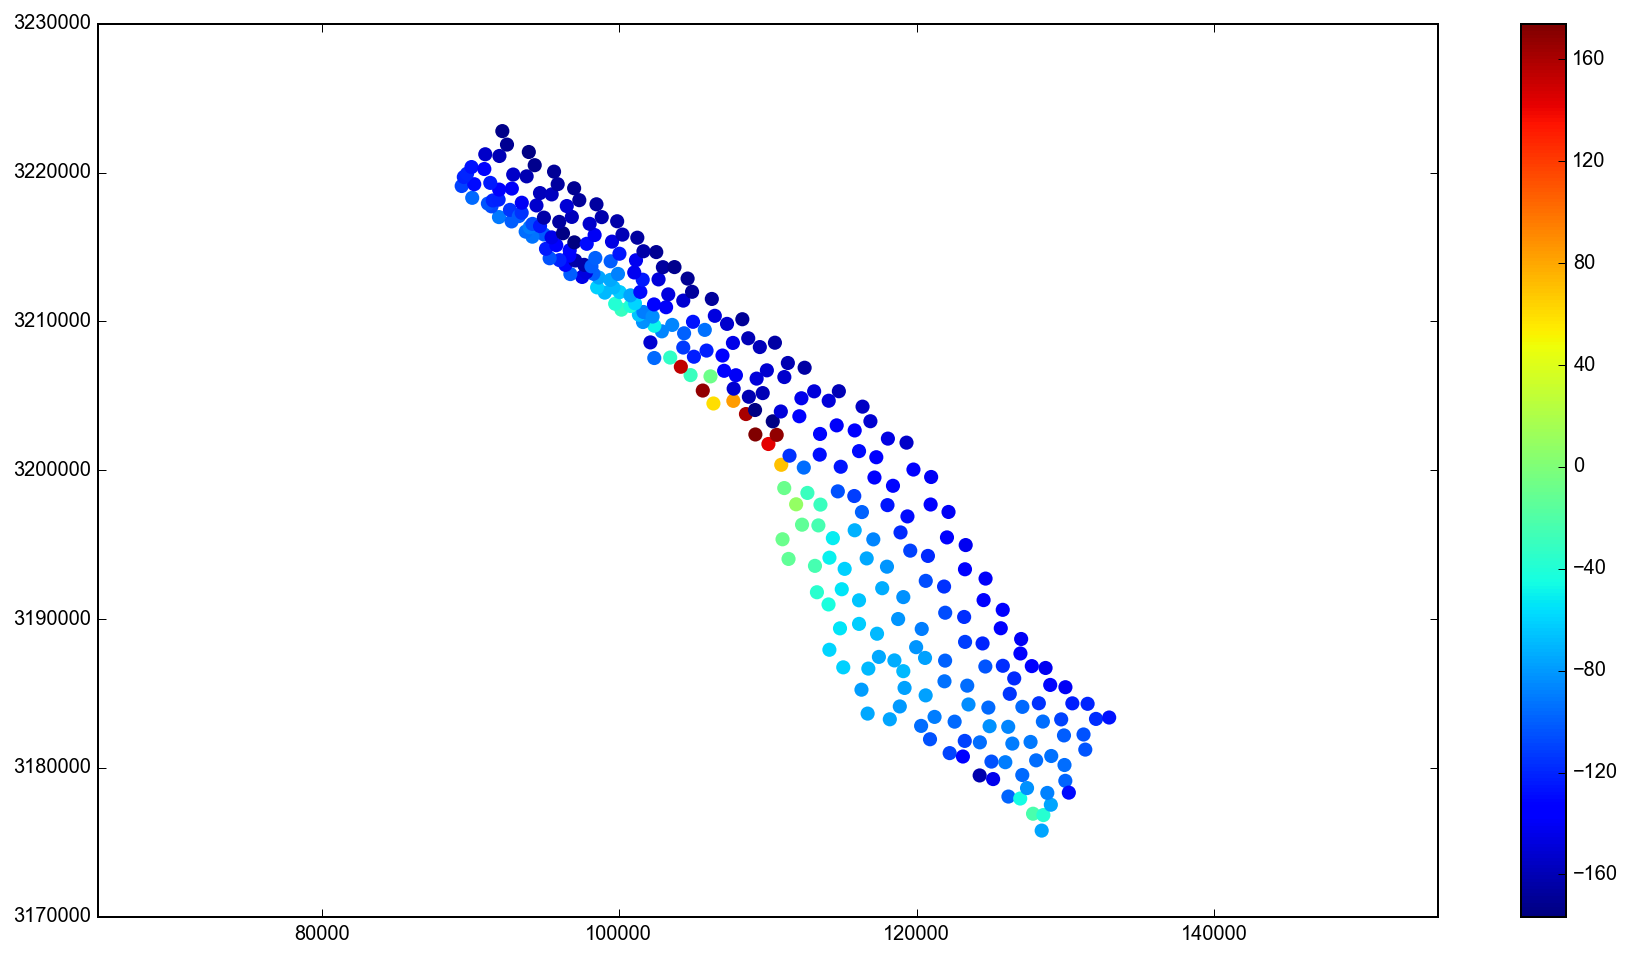

In [61]:
plt.figure(figsize=(15,8))
plt.scatter(tdf.east, tdf.north, c=tdf.tau_rake, 
            s=50, lw=0)
plt.colorbar()

plt.axis('equal')
plt.show()

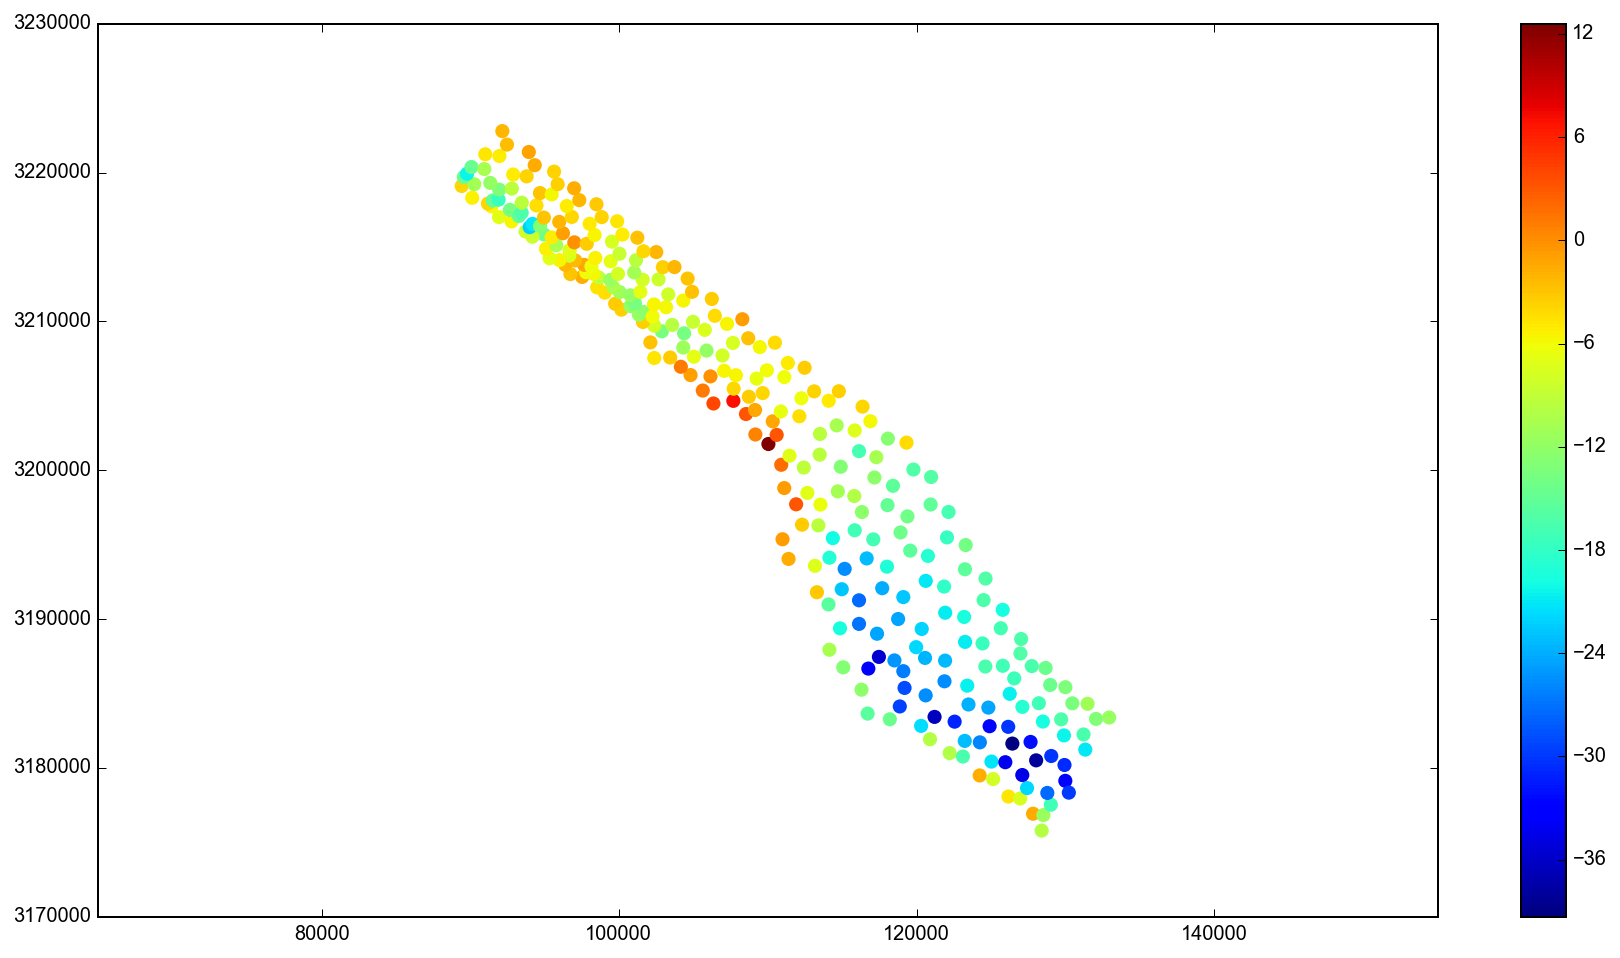

In [60]:
plt.figure(figsize=(15,8))
plt.scatter(tdf.east, tdf.north, c=tdf.tau_dd, 
            s=50, lw=0)
plt.colorbar()

plt.axis('equal')
plt.show()

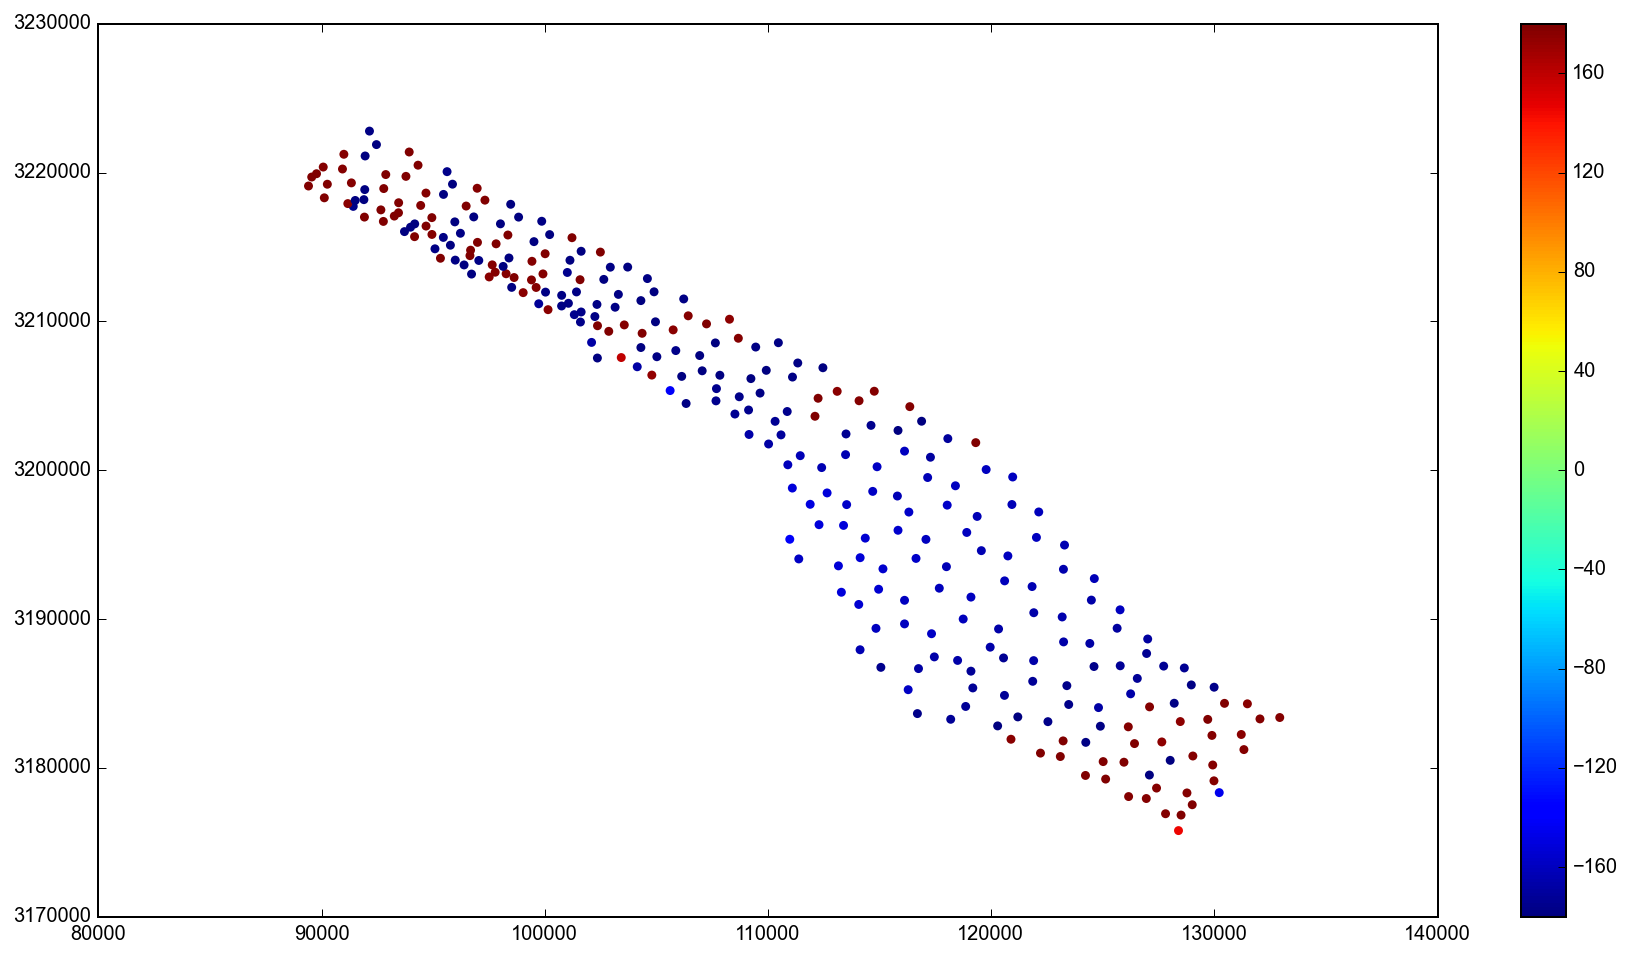

In [39]:
plt.figure(figsize=(15,8))
plt.scatter(tdf.east, tdf.north, c=tdf.rake, lw=0)
plt.colorbar()
plt.show()

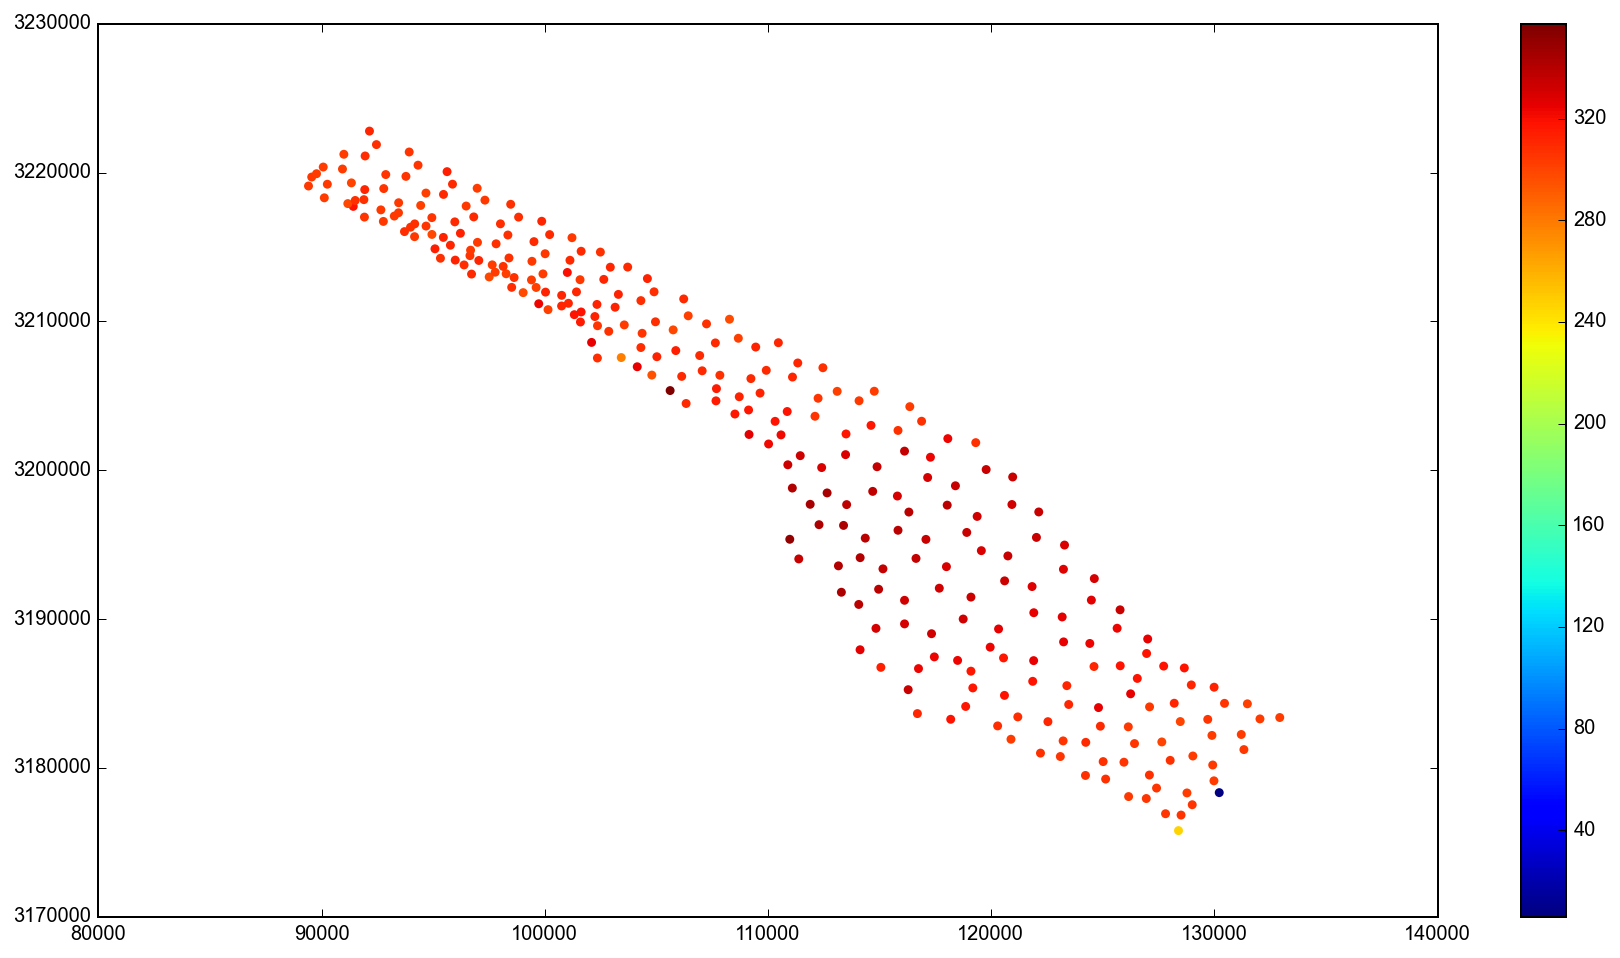

In [40]:
plt.figure(figsize=(15,8))
plt.scatter(tdf.east, tdf.north, c=tdf.strike, lw=0)
plt.colorbar()
plt.show()

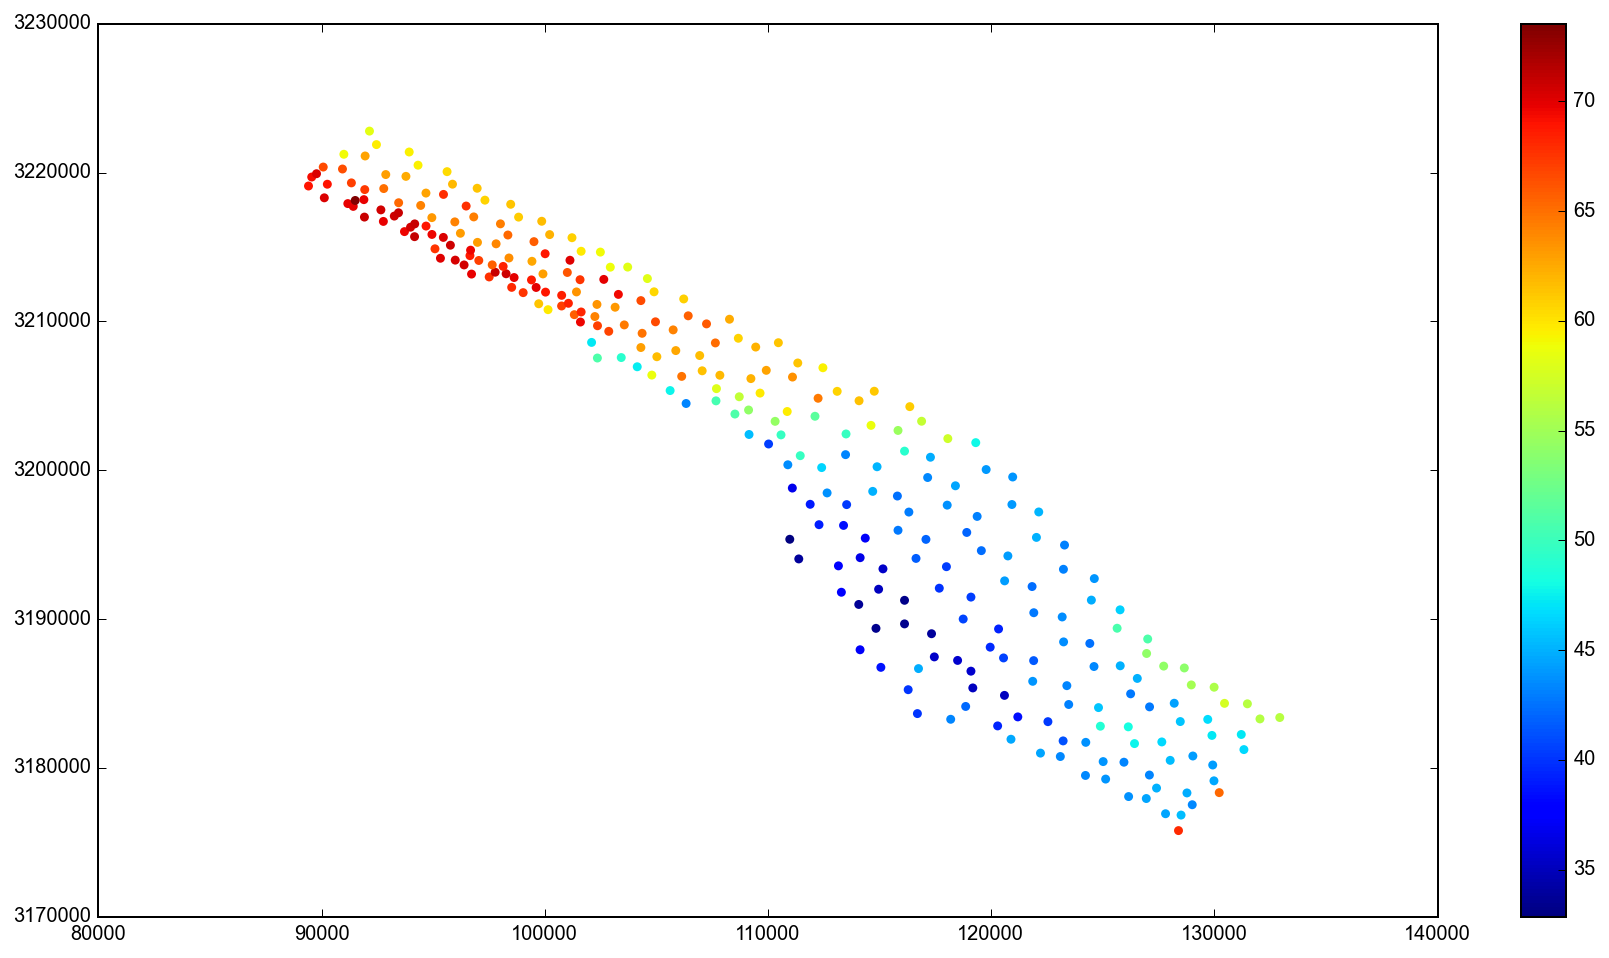

In [41]:
plt.figure(figsize=(15,8))
plt.scatter(tdf.east, tdf.north, c=tdf.dip, lw=0)
plt.colorbar()
plt.show()

In [42]:
gdf = fdf[fdf.fault_name=='gurla']

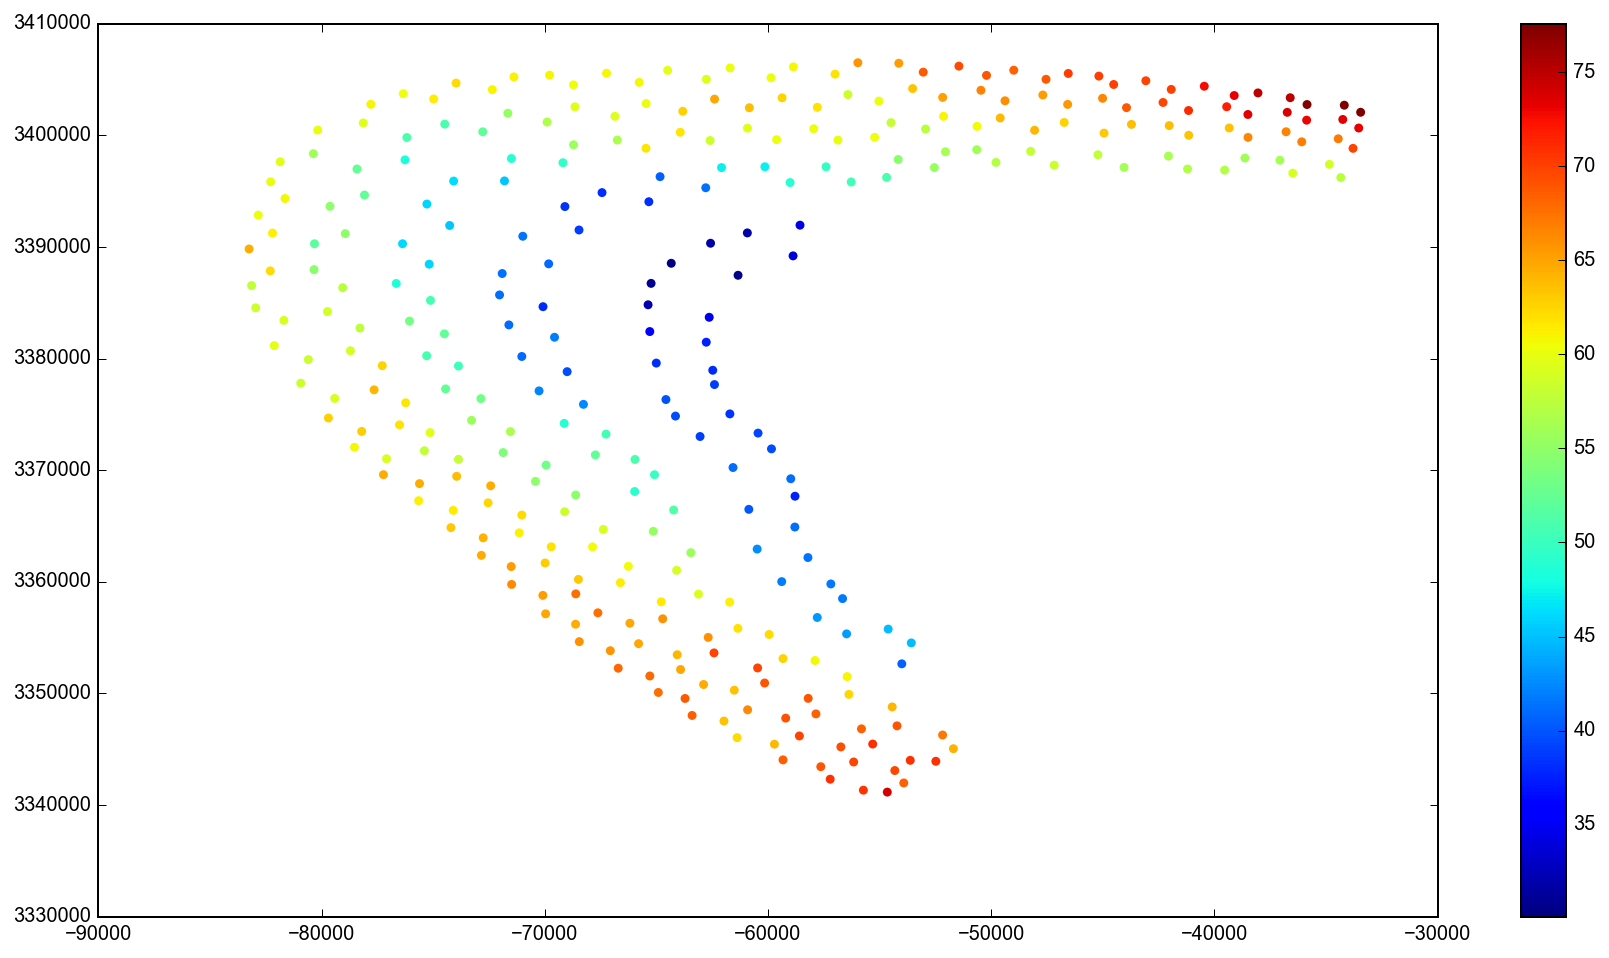

In [43]:
plt.figure(figsize=(15,8))
plt.scatter(gdf.east, gdf.north, c=gdf.dip, lw=0)
plt.colorbar()
plt.show()

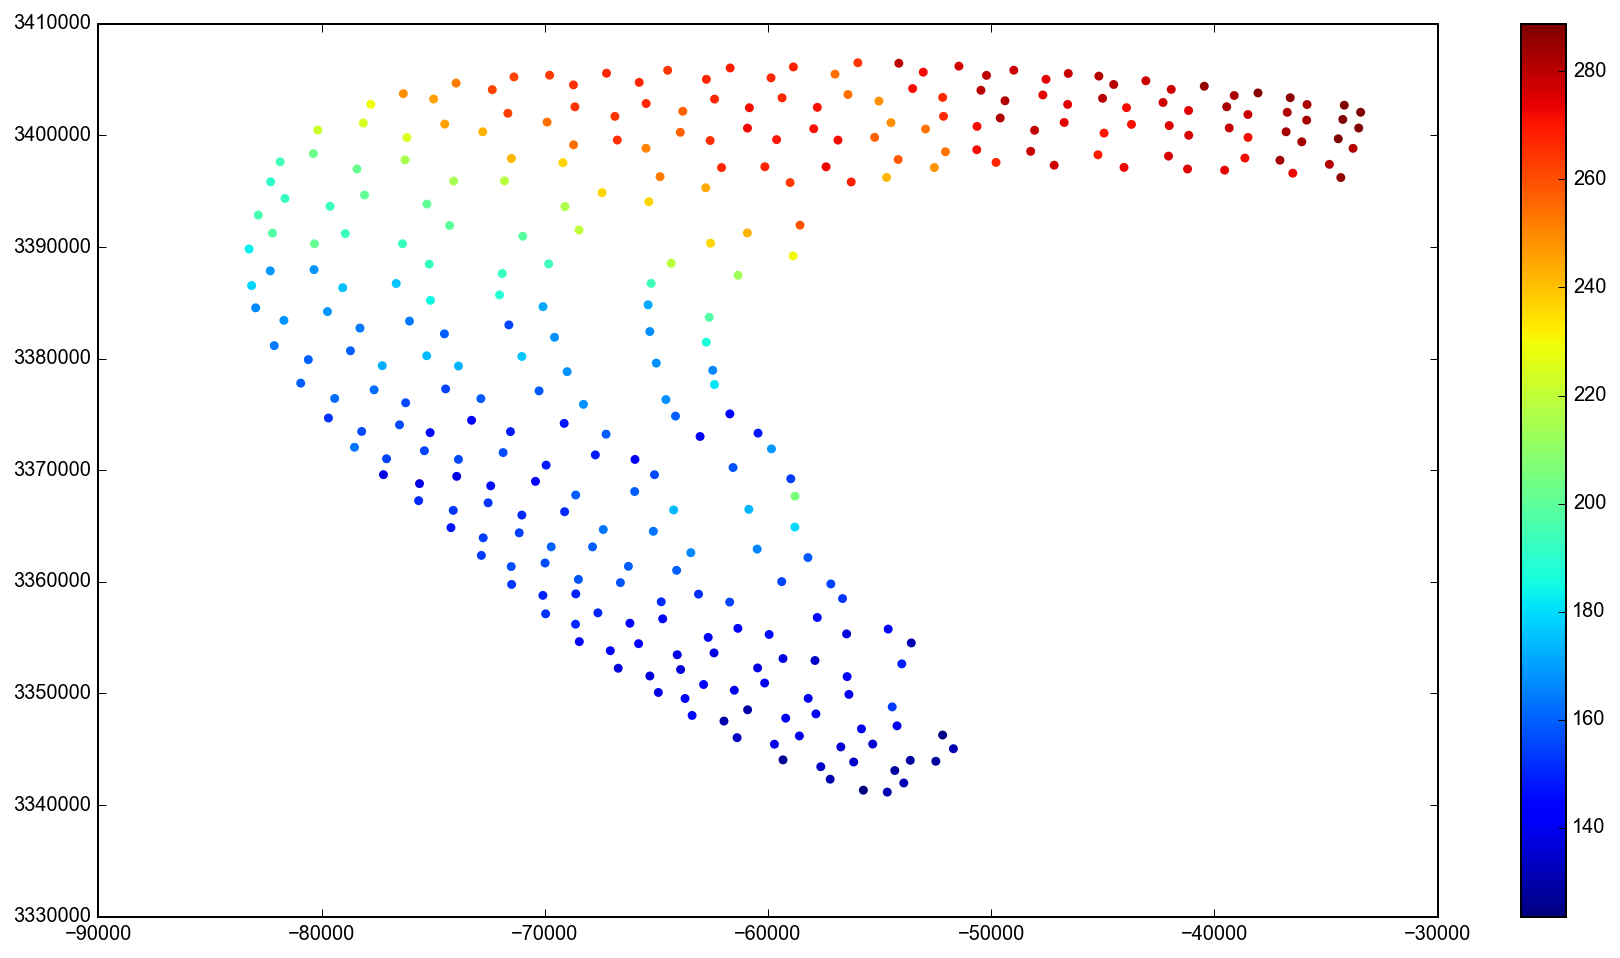

In [44]:
plt.figure(figsize=(15,8))
plt.scatter(gdf.east, gdf.north, c=hsp.unwrap_angle(gdf.strike), lw=0)
plt.colorbar()
plt.show()

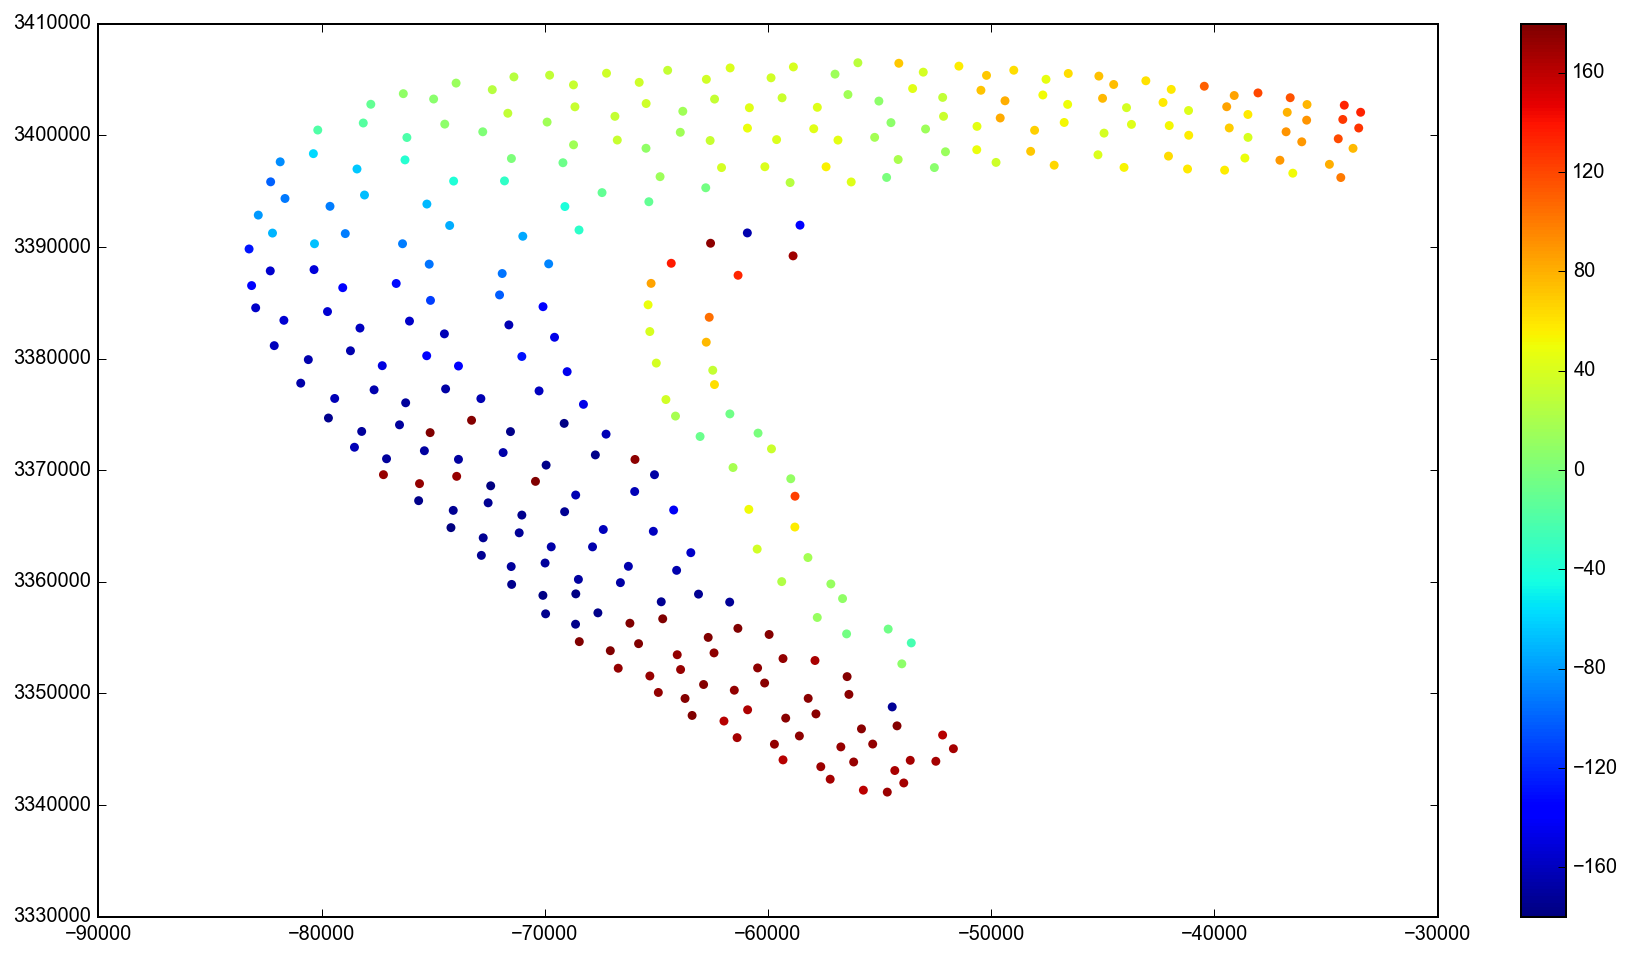

In [48]:
plt.figure(figsize=(15,8))
plt.scatter(gdf.east, gdf.north, c=gdf.tau_rake, lw=0)
plt.colorbar()
plt.show()